In [ ]:
# Imports
#!pip3 install nltk
#!pip install matplotlib
#!pip install seaborn
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('corpus')
#!pip install TextBlob
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
#!pip install spacytextblob
import spacy.cli
spacy.cli.download("en_core_web_sm")
import en_core_web_sm
#!pip install spacytextblob

In [4]:
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read the CrisisLogger input CSV File
url = "https://raw.githubusercontent.com/morganstanley/ML-for-Good-Hackathon/main/Data/CrisisLogger/crisislogger.csv"
df = pd.read_csv(url)
df

,upload_id,transcriptions
0,10,so high our experience so far has been a littl...
1,209,I'm not going to stay in my name for the anony...
2,216,so far I have been florentines now for about a...
3,222,it has actually been a very difficult. Trying ...
4,228,so this whole situation has been strange for u...
...,...,...
135,750,I am a parent of a 5th grader going into 6th g...
136,752,over 19 really impacted us because and it's no...
137,754,so today is May 20th and has been over for abo...
138,756,hi my name is divyansh not trying and I live i...


Check If there are any multiple transcripts per upload_id

In [6]:
t = df.groupby(['upload_id']).count()
t[t>1]

,transcriptions
upload_id,
10,NaN
209,NaN
216,NaN
222,NaN
228,NaN
...,...
750,NaN
752,NaN
754,NaN


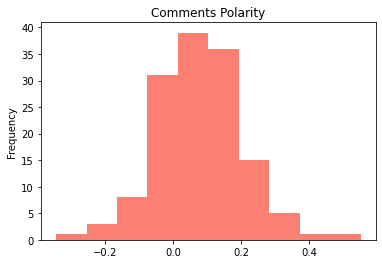

In [7]:
from textblob import TextBlob
df['polarity'] = df['transcriptions'].apply(lambda x: TextBlob(x).polarity)

#Plot
df['polarity'].plot.hist(color='salmon', title='Comments Polarity')

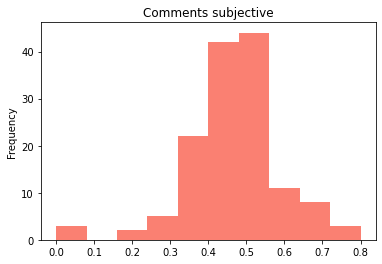

In [8]:
df['subjective'] = df['transcriptions'].apply(lambda x: TextBlob(x).subjectivity)

#Plot
df['subjective'].plot.hist(color='salmon', title='Comments subjective')

In [9]:
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob

def make_stop_words():
    return stopwords.words('english')

stop_words = make_stop_words()
def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in stop_words]
    
    return text
    
df['words'] = df['transcriptions'].apply(lambda x: clean_text(x))
print(df.head(1))


   upload_id                                     transcriptions  polarity  \
0         10  so high our experience so far has been a littl...  0.053302   

   subjective                                              words  
0    0.533933  [high, experience, far, little, bit, difficult...  


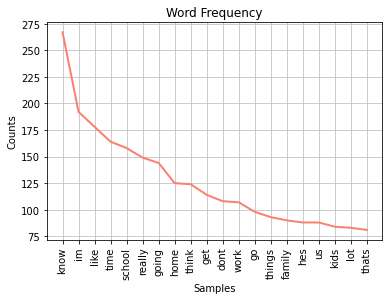

In [10]:
#From lists of comments to a single list containing all words      
all_words=[]        
for i in range(len(df)):
    all_words = all_words + df['words'][i]
#Get word frequency
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency')

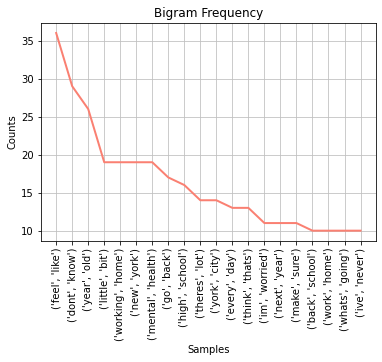

In [11]:
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

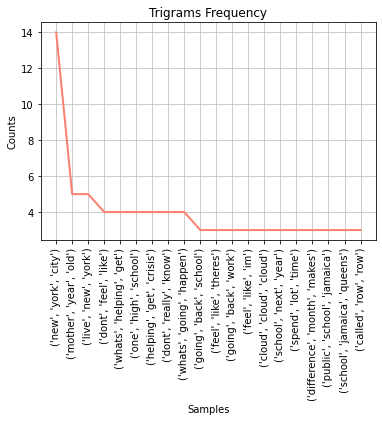

In [12]:
#trigrams
trigrams = list(nltk.trigrams(all_words))
words_3 = nltk.FreqDist(trigrams)
words_3.plot(20, color='salmon', title='Trigrams Frequency')

In [27]:
# Cleaning the text in the review column
df['transcriptions'] = df['transcriptions'].replace('[^A-Za-z]+')
df.head()

,upload_id,transcriptions
0,10,so high our experience so far has been a littl...
1,209,I'm not going to stay in my name for the anony...
2,216,so far I have been florentines now for about a...
3,222,it has actually been a very difficult. Trying ...
4,228,so this whole situation has been strange for u...


#Sentiment Analysis using TextBlob

In [6]:
from nltk import word_tokenize
text = "This is good"
tokens = word_tokenize(text)
tokens 

['This', 'is', 'good']

In [7]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['transcriptions'].apply(token_stop_pos)
df.head()

,upload_id,transcriptions,POS tagged
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little..."
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a..."
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half..."
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr..."
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us..."


In [8]:
# Lemmatization 
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
      else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,upload_id,transcriptions,POS tagged,Lemma
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...


In [9]:
# function to analyze the sentiment/polarity
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [10]:
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

In [11]:
# Test with Positive test data
from textblob import TextBlob
test=TextBlob("This is good test data").sentiment
testpolar = analysis(test.polarity)
testpolar

'Positive'

In [12]:
# Test with Negative test data
from textblob import TextBlob
test=TextBlob("This is bad test data").sentiment
testpolar = analysis(test.polarity)
testpolar

'Negative'

In [13]:
# Test with Not negative data
from textblob import TextBlob
test=TextBlob("This is not bad test data").sentiment
testpolar = analysis(test.polarity)
testpolar

'Positive'

In [14]:
df = pd.DataFrame(df)
df['Polarity'] = df['Lemma'].apply(getPolarity) 
df['AnalysisTextBlob'] = df['Polarity'].apply(analysis)
df

,upload_id,transcriptions,POS tagged,Lemma,Polarity,AnalysisTextBlob
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...,-0.003229,Negative
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...,0.062419,Positive
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...,0.002892,Positive
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...,0.192857,Positive
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...,0.011815,Positive
...,...,...,...,...,...,...
135,750,I am a parent of a 5th grader going into 6th g...,"[(parent, n), (5th, a), (grader, n), (going, v...",parent 5th grader go 6th grade son autism 75...,0.152721,Positive
136,752,over 19 really impacted us because and it's no...,"[(19, None), (really, r), (impacted, a), (us, ...",19 really impacted us 's shutdown school out...,0.055411,Positive
137,754,so today is May 20th and has been over for abo...,"[(today, n), (May, n), (20th, None), (two, Non...",today May 20th two month two make knock two ...,0.092363,Positive
138,756,hi my name is divyansh not trying and I live i...,"[(hi, n), (name, n), (divyansh, a), (trying, v...",hi name divyansh try live New York City want...,0.179040,Positive


In [15]:
tb_counts = df.AnalysisTextBlob.value_counts()
tb_counts

Positive    108
Negative     26
Neutral       6
Name: AnalysisTextBlob, dtype: int64

In [16]:
# Sentiment Analysis using TextBlob   resulted onto a POSITIVE sentiment

Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner. Vader sentiment tells if the statement is positive or negative along with the intensity of emotion.

The sum of pos, neg, neu intensities give 1. Compound ranges from -1 to 1 and is the metric used to draw the overall sentiment.
positive if compound >= 0.5
neutral if -0.5 < compound < 0.5
negative if -0.5 >= compound

In [17]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
    
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [18]:
# Test with Negative data
analyzer = SentimentIntensityAnalyzer()
vztest = analyzer.polarity_scores("I hate horror")
vztest


{'neg': 0.881, 'neu': 0.119, 'pos': 0.0, 'compound': -0.8126}

In [19]:
c = vadersentimentanalysis("I hate horror")
print(vader_analysis(c))

Negative


In [20]:
analyzer = SentimentIntensityAnalyzer()
df['VaderSentiment'] = df['Lemma'].apply(vadersentimentanalysis)
df['VaderAnalysis'] = df['VaderSentiment'].apply(vader_analysis)
df.head()


,upload_id,transcriptions,POS tagged,Lemma,Polarity,AnalysisTextBlob,VaderSentiment,VaderAnalysis
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...,-0.003229,Negative,0.9643,Positive
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...,0.062419,Positive,0.6720,Positive
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...,0.002892,Positive,0.9631,Positive
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...,0.192857,Positive,-0.5423,Negative
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...,0.011815,Positive,-0.2075,Neutral


In [21]:
vader_counts = df['VaderAnalysis'].value_counts()
vader_counts

Positive    79
Neutral     34
Negative    27
Name: VaderAnalysis, dtype: int64

In [22]:
# Sentiment Analysis using VADER  resulted onto a POSITIVE sentiment

Sentiment Analysis using SentiWordNet

SentiWordNet uses the WordNet database. It is important to obtain the POS, lemma of each word. We will then use the lemma, POS to obtain the synonym sets(synsets). We then obtain the positive, negative, objective scores for all the possible synsets or the very first synset and label the text.

if positive score > negative score, the sentiment is positive
if positive score < negative score, the sentiment is negative
if positive score = negative score, the sentiment is neutral

In [23]:
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    lemma = 0
    for word, pos in pos_data:
        #print(word +" "+ pos)
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        #print(lemma)
        if not lemma:
          continue
        synsets = wordnet.synsets(lemma, pos=pos)
        #print(synsets)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        #print(synset)
        swn_synset = swn.senti_synset(synset.name())
        #print(swn_synset)
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            #print('test')
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"

In [24]:
df['SWNAnalysis'] = df['POS tagged'].apply(sentiwordnetanalysis)
df.head()

,upload_id,transcriptions,POS tagged,Lemma,Polarity,AnalysisTextBlob,VaderSentiment,VaderAnalysis,SWNAnalysis
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...,-0.003229,Negative,0.9643,Positive,Negative
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...,0.062419,Positive,0.6720,Positive,Neutral
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...,0.002892,Positive,0.9631,Positive,Neutral
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...,0.192857,Positive,-0.5423,Negative,Positive
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...,0.011815,Positive,-0.2075,Neutral,Positive


In [25]:
df.head()

,upload_id,transcriptions,POS tagged,Lemma,Polarity,AnalysisTextBlob,VaderSentiment,VaderAnalysis,SWNAnalysis
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...,-0.003229,Negative,0.9643,Positive,Negative
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...,0.062419,Positive,0.6720,Positive,Neutral
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...,0.002892,Positive,0.9631,Positive,Neutral
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...,0.192857,Positive,-0.5423,Negative,Positive
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...,0.011815,Positive,-0.2075,Neutral,Positive


In [26]:
swn_counts= df['SWNAnalysis'].value_counts()
swn_counts

Neutral     88
Negative    29
Positive    23
Name: SWNAnalysis, dtype: int64

In [9]:
import spacy.cli
#spacy.cli.download("en_core_web_sm")
import en_core_web_sm

In [10]:
#pip install spacytextblob==0.1.7

In [15]:
from spacytextblob.spacytextblob import SpacyTextBlob
import spacy

In [17]:
import en_core_web_sm

In [18]:
nlp = en_core_web_sm.load()

In [ ]:
import en_core_web_sm
text = "I had good day"
#nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
nlp.add_pipe("spacytextblob")
nlp.pipe_names

In [ ]:
doc = nlp(text)
print(doc._.polarity)
print(doc._.subjectivity) 
print(doc._.assessments)
df['AnalysiSpacyTextBlob'] = 'test' 

In [ ]:
for transcriptions,i in zip(df.transcriptions,df.index):
  doc = nlp(transcriptions)
  df['AnalysiSpacyTextBlob'][i]=analysis(doc._.polarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,upload_id,transcriptions,POS tagged,Lemma,Polarity,AnalysisTextBlob,VaderSentiment,VaderAnalysis,SWNAnalysis,AnalysiSpacyTextBlob
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...,-0.003229,Negative,0.9643,Positive,Negative,Positive
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...,0.062419,Positive,0.6720,Positive,Neutral,Negative
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...,0.002892,Positive,0.9631,Positive,Neutral,Positive
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...,0.192857,Positive,-0.5423,Negative,Positive,Positive
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...,0.011815,Positive,-0.2075,Neutral,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...
135,750,I am a parent of a 5th grader going into 6th g...,"[(parent, n), (5th, a), (grader, n), (going, v...",parent 5th grader go 6th grade son autism 75...,0.152721,Positive,-0.3892,Neutral,Neutral,Positive
136,752,over 19 really impacted us because and it's no...,"[(19, None), (really, r), (impacted, a), (us, ...",19 really impacted us 's shutdown school out...,0.055411,Positive,0.4767,Neutral,Positive,Negative
137,754,so today is May 20th and has been over for abo...,"[(today, n), (May, n), (20th, None), (two, Non...",today May 20th two month two make knock two ...,0.092363,Positive,0.9741,Positive,Positive,Positive
138,756,hi my name is divyansh not trying and I live i...,"[(hi, n), (name, n), (divyansh, a), (trying, v...",hi name divyansh try live New York City want...,0.179040,Positive,0.9858,Positive,Neutral,Positive


In [ ]:
spacy_counts= df['AnalysiSpacyTextBlob'].value_counts()
spacy_counts

Positive    102
Negative     35
Neutral       3
Name: AnalysiSpacyTextBlob, dtype: int64

([<matplotlib.patches.Wedge at 0x7f07af1ca3d0>,
 [Text(-0.7237325630784132, 0.828378643580308, 'Positive'),
  Text(0.6663689733074856, -0.8751870608122173, 'Negative'),
  Text(1.3469420737059732, -0.09081327039950286, 'Neutral')],
 [Text(-0.39476321622458893, 0.45184289649834974, '72.9%'),
  Text(0.3634739854404467, -0.4773747604430275, '25.0%'),
  Text(0.8480746390000571, -0.05717872580709439, '2.1%')])

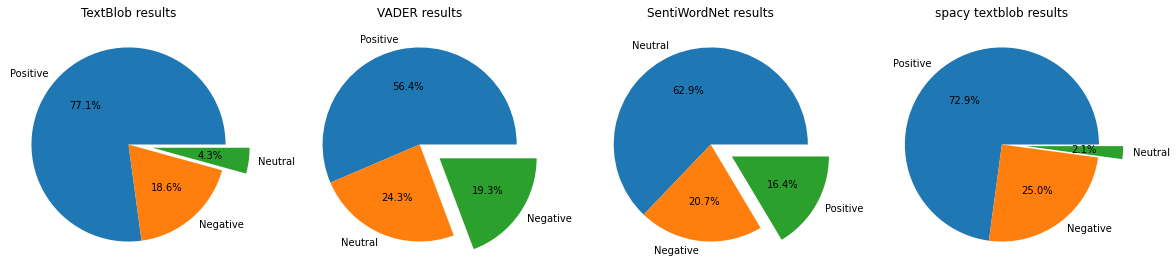

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,4,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,4,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,4,4)
plt.title("spacy textblob results")
plt.pie(spacy_counts.values, labels = spacy_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

Using NLP - SpaCy to parse text. It is open source software python library for information extractsion and preprocessing text for modelling  
Trying to understand what are top 10 used adjectives in transcripts



In [ ]:
# import spacy
import spacy

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
# create spacy 
adj={}

for ttext in df.transcriptions:
  doc = nlp(ttext)
  for token in doc:
    #print(token.text,'->',token.pos_)
    if (token.pos_ in ('ADJ') and token.text not in ('other','able')):
      #print(token.text,'->',token.pos_)
      if token.text in adj.keys():
        #print(token.text,'->',token.pos_)
        adj[token.text] = adj[token.text] +1
      else:
        adj[token.text]=1   

In [ ]:
# N largest values in dictionary
# Using sorted() + itemgetter() + items()
from operator import itemgetter
N=20
resplt = dict(sorted(adj.items(), key = itemgetter(1), reverse = True)[:N])
res = dict(sorted(adj.items(), key = itemgetter(1), reverse = True))

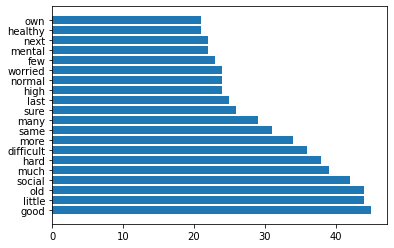

In [ ]:
names = list(resplt.keys())
values = list(resplt.values())

#tick_label does the some work as plt.xticks()
#plt.bar(range(len(res)), values, tick_label = names)
# Create horizontal bars
plt.barh(y=names, width=values)
plt.savefig('bar.png')
plt.show()

In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

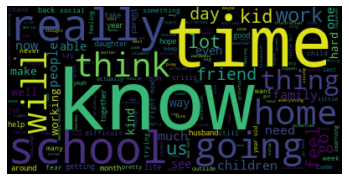

In [7]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.transcriptions)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

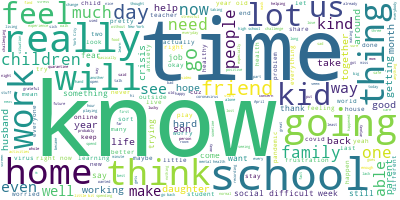

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['transcriptions'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
# Topic Modelling  with Gensim LDA

In [28]:
#Prepare data for LDA Analysis
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kushi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.transcriptions.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['high', 'experience', 'far', 'little', 'bit', 'difficult', 'teenage', 'child', 'stuck', 'house', 'five', 'six', 'weeks', 'far', 'mean', 'homeschooling', 'know', 'friends', 'hard', 'see', 'see', 'facetime', 'working', 'home', 'difficult', 'wearing', 'mind', 'working', 'home', 'maybe']


In [30]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


In [31]:
#LDA model
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"time" + 0.007*"work" + 0.007*"know" + 0.006*"really" + '
  '0.005*"friends" + 0.004*"home" + 0.004*"feel" + 0.004*"kind" + 0.004*"also" '
  '+ 0.004*"virus"'),
 (1,
  '0.024*"know" + 0.013*"like" + 0.011*"get" + 0.010*"going" + 0.009*"really" '
  '+ 0.009*"home" + 0.009*"time" + 0.009*"school" + 0.007*"go" + 0.006*"day"'),
 (2,
  '0.016*"know" + 0.011*"time" + 0.010*"going" + 0.009*"school" + 0.007*"home" '
  '+ 0.007*"really" + 0.007*"people" + 0.007*"like" + 0.006*"go" + '
  '0.006*"friends"'),
 (3,
  '0.017*"know" + 0.013*"think" + 0.012*"really" + 0.010*"like" + 0.010*"time" '
  '+ 0.008*"going" + 0.008*"school" + 0.007*"get" + 0.006*"things" + '
  '0.006*"friends"'),
 (4,
  '0.018*"know" + 0.012*"work" + 0.011*"school" + 0.010*"think" + 0.010*"like" '
  '+ 0.009*"going" + 0.009*"really" + 0.008*"time" + 0.007*"feel" + '
  '0.007*"home"'),
 (5,
  '0.018*"know" + 0.015*"like" + 0.014*"time" + 0.012*"going" + 0.010*"really" '
  '+ 0.009*"think" + 0.009*"school" + 0.008

In [33]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

p = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
p

C:\Users\kushi\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.035486 -0.003554       1        1  28.355839
8     -0.018053 -0.003406       2        1  18.256715
5     -0.029987  0.009765       3        1  15.708598
4     -0.012000 -0.010951       4        1  11.694797
3     -0.019792  0.005757       5        1   6.926280
2     -0.012750  0.010863       6        1   5.535961
7     -0.005847 -0.013888       7        1   5.059071
6      0.050065 -0.054118       8        1   4.872429
9      0.028807  0.016097       9        1   1.963675
0      0.055042  0.043435      10        1   1.626635, topic_info=         Term        Freq       Total Category  logprob  loglift
218      time  141.000000  141.000000  Default  30.0000  30.0000
35       know  235.000000  235.000000  Default  29.0000  29.0000
295    really  123.000000  123.000000  Default  28.0000  28.0000
31       home  108.000000  108.000000  Default  27.0000  27.0000
187    school  134.000000  134.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
312  together    0.572447   37.679039  Topic10  -6.0103  -0.0683
311    things    0.594412   75.898542  Topic10  -5.9727  -0.7309
36       like    0.613849  159.013991  Topic10  -5.9405  -1.4383
390   worried    0.524558   19.405168  Topic10  -6.0977   0.5079
315    trying    0.526664   26.587160  Topic10  -6.0937   0.1970

[757 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
501       1  0.534670  abilities
0         1  0.241252       able
0         2  0.180939       able
0         3  0.140730       able
0         4  0.140730       able
...     ...       ...        ...
1969      4  0.633616      youth
500       1  0.270514       zoom
500       2  0.360685       zoom
500       3  0.090171       zoom
500       4  0.090171       zoom

[1419 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 6, 5, 4, 3, 8, 7, 10, 1])

In [ ]:
# Topic Modelling SkLearn LDA

In [34]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df.transcriptions)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df.transcriptions)

# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\kushi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "
C:\Users\kushi\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.046748  0.021809       1        1  13.292381
5     -0.001316 -0.015617       2        1  12.027931
1     -0.130879  0.037549       3        1  12.001765
8     -0.010173  0.022532       4        1   8.612817
12     0.083542  0.000687       5        1   7.450759
14    -0.155335  0.112531       6        1   7.232373
17    -0.040875 -0.024178       7        1   7.124937
19     0.060949  0.140757       8        1   6.032812
9     -0.050036  0.018991       9        1   5.719298
18    -0.163352 -0.088513      10        1   4.099542
11     0.165986 -0.171737      11        1   3.132221
3     -0.051169 -0.145350      12        1   2.670499
13     0.063705  0.082531      13        1   2.657302
10    -0.077927 -0.034688      14        1   2.035326
15    -0.094347 -0.019259      15        1   1.465356
6      0.065869 -0.147524      16        1   1.378533
2      0.129397  0.138709      17        1   1.279200
16     0.106198 -0.039761      18        1   0.863648
7      0.119069  0.051714      19        1   0.616384
0      0.027439  0.058817      20        1   0.306915, topic_info=         Term        Freq       Total Category  logprob  loglift
85       know  260.000000  260.000000  Default  30.0000  30.0000
91       like  173.000000  173.000000  Default  29.0000  29.0000
179     think  121.000000  121.000000  Default  28.0000  28.0000
59      going  140.000000  140.000000  Default  27.0000  27.0000
41     family   87.000000   87.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
149       say    0.039796   29.832450  Topic20  -6.1579  -0.8332
137  probably    0.039796   16.496860  Topic20  -6.1579  -0.2408
148      said    0.039796   17.336205  Topic20  -6.1579  -0.2904
147      safe    0.039796   16.327336  Topic20  -6.1579  -0.2305
140     quite    0.039796   12.596739  Topic20  -6.1579   0.0289

[883 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.248915  able
0         2  0.066377  able
0         3  0.182538  able
0         4  0.066377  able
0         5  0.099566  able
...     ...       ...   ...
203       9  0.173562  zoom
203      10  0.086781  zoom
203      11  0.086781  zoom
203      13  0.173562  zoom
203      16  0.086781  zoom

[1583 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 2, 9, 13, 15, 18, 20, 10, 19, 12, 4, 14, 11, 16, 7, 3, 17, 8, 1])